In [1]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [1]:
import sys
import os

sys.path.append("../")
# ! pip install -r ../../../requirements.txt
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd

In [2]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

In [3]:
# ! grep "TRAIN_END" val_csv_8_16_8/model_training_london_scales_8_16_8.txt | sed 's/TRAIN_END: //g' | sed 's/ /,/g' > val_csv_8_16_8/CSR_stats.csv 

In [4]:
# CSR_stats_file = pd.read_csv("val_csv_4_8_4/CSR_stats.csv")
# CSR_stats_file.head()

# CSR_file_dict = {}
# for i in range(CSR_stats_file.shape[0]):
#     CSR_file_dict[CSR_stats_file.iloc[i].cityname.lower(),
#                   CSR_stats_file.iloc[i].io_length,
#                   CSR_stats_file.iloc[i].pred_horiz,
#                   CSR_stats_file.iloc[i].scale] \
#                         = {"MP":                   CSR_stats_file.iloc[i].CSR_MP_no_thresh_mean, \
#                               "PM":                   CSR_stats_file.iloc[i].CSR_PM_no_thresh_mean,\
#                           "PM_frac":                   (CSR_stats_file.iloc[i].CSR_PM_no_thresh_frac_mean-1)}
# # CSR_file_dict

london  Empty/Not found, ignoring; plot will be missing
[Errno 2] No such file or directory: 'val_csv_all_models_all_cities/val_csv_london-4-1-85-.csv'
madrid  Empty/Not found, ignoring; plot will be missing
No columns to parse from file
GIGO case:  madrid-4-1-45-
GIGO case:  madrid-4-1-25-
melbourne  Empty/Not found, ignoring; plot will be missing
[Errno 2] No such file or directory: 'val_csv_all_models_all_cities/val_csv_melbourne-4-1-85-.csv'


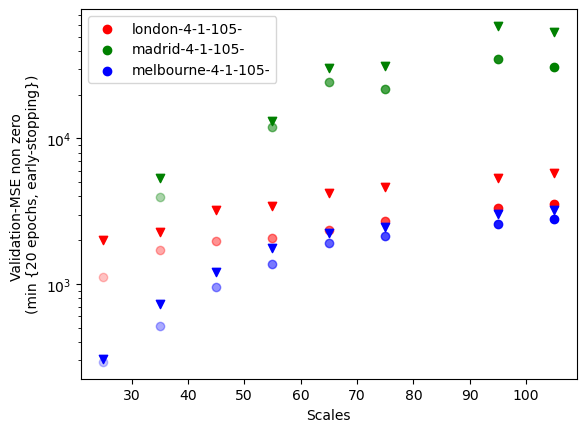

In [14]:

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in config.scales[::-1]: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                # loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                # sprint (val_loss)
                # sprint (val_loss[-1])
                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue                    
                    
                if cityname in city_label_printed:
                    plt.scatter(scale, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=scale/105)
                    # plt.scatter(scale, naive_model[-1], 
                    #          color=city_color[cityname],\
                    #         alpha=scale/95,
                    #            marker="*")                    
                else:
                    plt.scatter(scale, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=scale/105, \
                            label=prefix)
                    city_label_printed.append(cityname)
                plt.scatter(scale, naive_model[-1], marker='v', color=city_color[cityname])



plt.xlabel("Scales")
plt.ylabel("Validation-MSE non zero \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()





london  Empty/Not found, ignoring; plot will be missing
[Errno 2] No such file or directory: 'val_csv_all_models_all_cities/val_csv_london-4-1-85-.csv'
madrid  Empty/Not found, ignoring; plot will be missing
No columns to parse from file
GIGO case:  madrid-4-1-45-
GIGO case:  madrid-4-1-25-
melbourne  Empty/Not found, ignoring; plot will be missing
[Errno 2] No such file or directory: 'val_csv_all_models_all_cities/val_csv_melbourne-4-1-85-.csv'


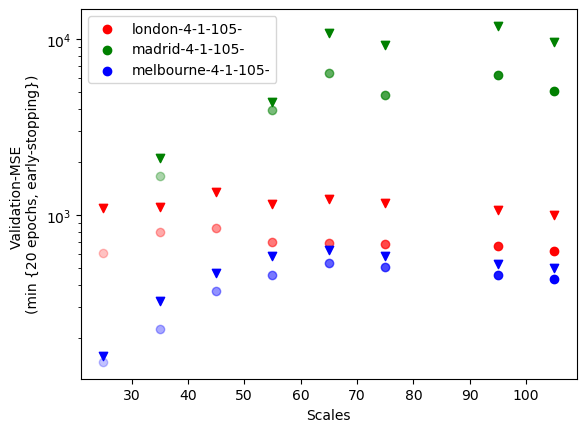

In [15]:

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in config.scales[::-1]: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-mse"].tolist()
                val_non_zero_mse = df["val_loss"].tolist()

                # loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                # sprint (val_loss)
                # sprint (val_loss[-1])
                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue                    
                    
                if cityname in city_label_printed:
                    plt.scatter(scale, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=scale/105)
                    # plt.scatter(scale, naive_model[-1], 
                    #          color=city_color[cityname],\
                    #         alpha=scale/95,
                    #            marker="*")                    
                else:
                    plt.scatter(scale, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=scale/105, \
                            label=prefix)
                    city_label_printed.append(cityname)
                plt.scatter(scale, naive_model[-1], marker='v', color=city_color[cityname])



plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()





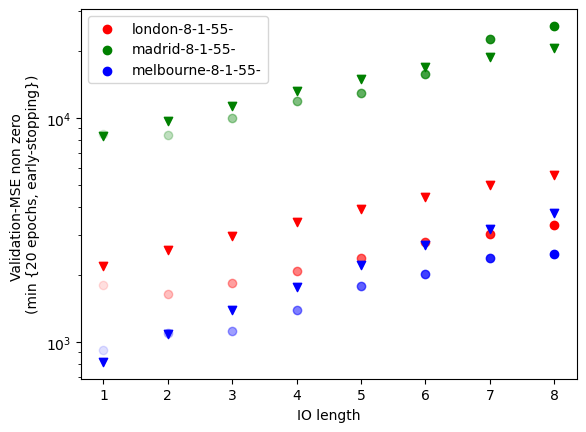

In [24]:

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths[::-1]:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                # loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                # sprint (val_loss)
                # sprint (val_loss[-1])
                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                # if naive_model[-1] < min_val_mse_non_zero:
                #     # invalid, GIGO regime
                #     print ("GIGO case: ", prefix)                    
                #     continue                    
                    
                if cityname in city_label_printed:
                    plt.scatter(i_o_length, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=i_o_length/max(config.i_o_lengths))
                    # plt.scatter(scale, naive_model[-1], 
                    #          color=city_color[cityname],\
                    #         alpha=scale/95,
                    #            marker="*")                    
                else:
                    plt.scatter(i_o_length, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=i_o_length/max(config.i_o_lengths), \
                            label=prefix)
                    city_label_printed.append(cityname)
                plt.scatter(i_o_length, naive_model[-1], marker='v', color=city_color[cityname])
                    



plt.xlabel("IO length")
plt.ylabel("Validation-MSE non zero \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()





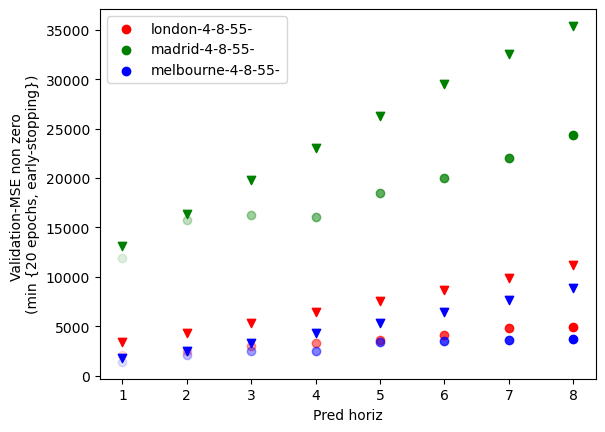

In [26]:

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz[::-1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                # loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                # sprint (val_loss)
                # sprint (val_loss[-1])
                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue                    
                    
                if cityname in city_label_printed:
                    plt.scatter(pred_horiz, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=pred_horiz/max(config.pred_horiz))
                    # plt.scatter(scale, naive_model[-1], 
                    #          color=city_color[cityname],\
                    #         alpha=scale/95,
                    #            marker="*")                    
                else:
                    plt.scatter(pred_horiz, min_val_mse_non_zero, 
                             color=city_color[cityname],\
                            alpha=pred_horiz/(max(config.pred_horiz)), \
                            label=prefix)
                    city_label_printed.append(cityname)
                plt.scatter(pred_horiz, naive_model[-1], marker='v', color=city_color[cityname])



plt.xlabel("Pred horiz")
plt.ylabel("Validation-MSE non zero \n(min {20 epochs, early-stopping})")
# plt.yscale('log')
plt.legend()
plt.show()





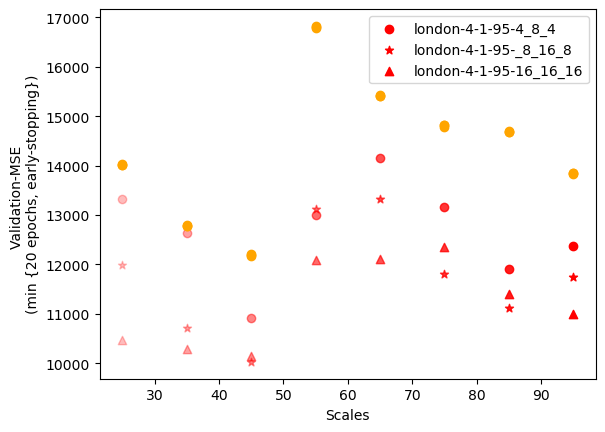

stats.spearmanr(csr_PM_list, val_loss_non_zero_list) : SignificanceResult(statistic=0.5952380952380953, pvalue=0.11952980613879259)
stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list) : SignificanceResult(statistic=0.9285714285714287, pvalue=0.0008629681828999769)
stats.spearmanr(csr_model_list, val_loss_non_zero_list) : SignificanceResult(statistic=0.7142857142857144, pvalue=0.04652823228416724)
stats.spearmanr(csr_model_list, csr_PM_list) : SignificanceResult(statistic=0.9047619047619048, pvalue=0.0020082755054294677)
stats.pearsonr(csr_PM_list, val_loss_non_zero_list) : PearsonRResult(statistic=0.8638490520869246, pvalue=0.005682853190367134)
stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list) : PearsonRResult(statistic=0.9349574056726053, pvalue=0.0006547918897340235)
stats.pearsonr(csr_model_list, val_loss_non_zero_list) : PearsonRResult(statistic=0.8713860943403582, pvalue=0.004818833909664989)
stats.pearsonr(csr_model_list, csr_PM_list) : PearsonRResult(statistic=0.99

In [113]:

# scales
for city in ["London"]:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in [25, 35, 45, 55, 65, 75, 85, 95][::-1]: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in [4]:
            for pred_horiz in [1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_4_8_4", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                if naive_model[-1] < val_non_zero_mse[-1] and naive_model[-2] < val_non_zero_mse[-2]:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                CSR_MP = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["MP"]
                CSR_PM = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM"]
                CSR_PM_frac = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM_frac"]                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=scale/95)
                else:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=scale/95, \
                            label=prefix + "4_8_4")
                    city_label_printed.append(cityname)
                    
                # plt.scatter(scale, CSR_MP, marker="^", s = 20, color="black") 
                # plt.scatter(scale, CSR_PM, marker="*", s = 20, color="green")   
                # plt.scatter(scale, 4000 + (CSR_PM_frac-1)*4000, marker="*", s = 20, color="red")   
                # plt.scatter(scale, CSR_PM-CSR_MP, marker = "*", s=30, color="black")
                # plt.scatter(scale, loss[-1], alpha=1, color="green")
                plt.scatter(scale, naive_model[-1], alpha=1, color="orange")                

                csr_model_list.append(CSR_MP)
                csr_PM_list.append(CSR_PM)                
                csr_PM_frac_list.append(CSR_PM_frac)
                
                val_loss_non_zero_list.append(min(val_non_zero_mse[-1], val_non_zero_mse[-2])) 
                # min of last two values since the early stopping takes care of restoring the model
                # we have early stopping = 1 


    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in [25, 35, 45, 55, 65, 75, 85, 95][::-1]: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in [4]:
            for pred_horiz in [1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_8_16_8", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                if naive_model[-1] < val_non_zero_mse[-1] and naive_model[-2] < val_non_zero_mse[-2]:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                CSR_MP = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["MP"]
                CSR_PM = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM"]
                CSR_PM_frac = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM_frac"]                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), marker="*",
                             color=city_color[cityname],\
                            alpha=scale/95)
                else:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), marker="*",
                             color=city_color[cityname],\
                            alpha=scale/95, \
                            label=prefix + "_8_16_8")
                    city_label_printed.append(cityname)
                    
#                 plt.scatter(scale, CSR_MP, marker="^", s = 20, color="black") 
#                 plt.scatter(scale, CSR_PM, marker="*", s = 20, color="green")   
                # plt.scatter(scale, 4000 + (CSR_PM_frac-1)*4000, marker="*", s = 20, color="red")   
                # plt.scatter(scale, CSR_PM-CSR_MP, marker = "*", s=30, color="black")
                # plt.scatter(scale, loss[-1], alpha=1, color="green")
                plt.scatter(scale, naive_model[-1], alpha=1, color="orange")                

                csr_model_list.append(CSR_MP)
                csr_PM_list.append(CSR_PM)                
                csr_PM_frac_list.append(CSR_PM_frac)
                
                val_loss_non_zero_list.append(min(val_non_zero_mse[-1], val_non_zero_mse[-2])) 
                # min of last two values since the early stopping takes care of restoring the model
                # we have early stopping = 1 
                
    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in [25, 35, 45, 55, 65, 75, 85, 95][::-1]: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in [4]:
            for pred_horiz in [1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_16_16_16", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                if naive_model[-1] < val_non_zero_mse[-1] and naive_model[-2] < val_non_zero_mse[-2]:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                CSR_MP = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["MP"]
                CSR_PM = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM"]
                CSR_PM_frac = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM_frac"]                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), marker="^",
                             color=city_color[cityname],\
                            alpha=scale/95)
                else:
                    plt.scatter(scale, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), marker="^",
                             color=city_color[cityname],\
                            alpha=scale/95, \
                            label=prefix + "16_16_16")
                    city_label_printed.append(cityname)
                    
                # plt.scatter(scale, CSR_MP, marker="^", s = 20, color="black") 
                # plt.scatter(scale, CSR_PM, marker="*", s = 20, color="green")   
                # plt.scatter(scale, 4000 + (CSR_PM_frac-1)*4000, marker="*", s = 20, color="red")   
                # plt.scatter(scale, CSR_PM-CSR_MP, marker = "*", s=30, color="black")
                # plt.scatter(scale, loss[-1], alpha=1, color="green")
                plt.scatter(scale, naive_model[-1], alpha=1, color="orange")                

                csr_model_list.append(CSR_MP)
                csr_PM_list.append(CSR_PM)                
                csr_PM_frac_list.append(CSR_PM_frac)
                
                val_loss_non_zero_list.append(min(val_non_zero_mse[-1], val_non_zero_mse[-2])) 
                # min of last two values since the early stopping takes care of restoring the model
                # we have early stopping = 1                 
                

    plt.xlabel("Scales")
    plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
    # plt.yscale('log')
    plt.legend()
    plt.show()

from scipy import stats
sprint (stats.spearmanr(csr_PM_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_model_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_model_list, csr_PM_list))

sprint (stats.pearsonr(csr_PM_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_model_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_model_list, csr_PM_list))

GIGO case:  london-17-1-75-
GIGO case:  london-16-1-75-
GIGO case:  london-15-1-75-
GIGO case:  london-14-1-75-
GIGO case:  london-13-1-75-
GIGO case:  london-12-1-75-
GIGO case:  london-11-1-75-
GIGO case:  london-10-1-75-
GIGO case:  london-9-1-75-
GIGO case:  london-7-1-75-


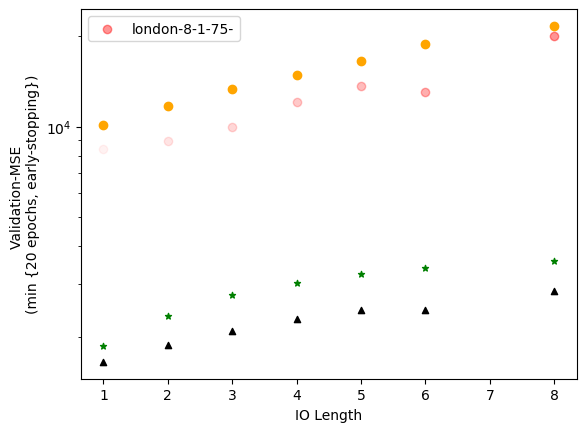

stats.spearmanr(csr_PM_list, val_loss_non_zero_list) : SignificanceResult(statistic=0.9642857142857145, pvalue=0.0004541491691941689)
stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list) : SignificanceResult(statistic=-0.9642857142857145, pvalue=0.0004541491691941689)
stats.spearmanr(csr_model_list, val_loss_non_zero_list) : SignificanceResult(statistic=0.9642857142857145, pvalue=0.0004541491691941689)
stats.spearmanr(csr_model_list, csr_PM_list) : SignificanceResult(statistic=1.0, pvalue=0.0)
stats.pearsonr(csr_PM_list, val_loss_non_zero_list) : PearsonRResult(statistic=0.8503210522401856, pvalue=0.015332479897516522)
stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list) : PearsonRResult(statistic=-0.8647445934426107, pvalue=0.011998418060306238)
stats.pearsonr(csr_model_list, val_loss_non_zero_list) : PearsonRResult(statistic=0.9418500624961059, pvalue=0.0015176163015419976)
stats.pearsonr(csr_model_list, csr_PM_list) : PearsonRResult(statistic=0.9770035498191691, pvalue=0.00

In [92]:

# scales
for city in ["London"]:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in [75]:
        for i_o_length in list(range(1, 18))[::-1]:
            for pred_horiz in [1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_non_zero_london", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                if naive_model[-1] < val_non_zero_mse[-1] and naive_model[-2] < val_non_zero_mse[-2]:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                CSR_MP = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["MP"]
                CSR_PM = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM"]
                CSR_PM_frac = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM_frac"]                
                
                if cityname in city_label_printed:
                    plt.scatter(i_o_length, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=i_o_length/19)
                else:
                    plt.scatter(i_o_length, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=i_o_length/19, \
                            label=prefix)
                    city_label_printed.append(cityname)
                    
                plt.scatter(i_o_length, CSR_MP, marker="^", s = 20, color="black") 
                plt.scatter(i_o_length, CSR_PM, marker="*", s = 20, color="green")   
                # plt.scatter(i_o_length, CSR_PM-CSR_MP, marker="*", s = 20, color="green")   
                
                # plt.scatter(i_o_length, 4000 + (CSR_PM_frac-1) * 4000, marker="*", s = 20, color="red")   
                plt.scatter(i_o_length, naive_model[-1], alpha=1, color="orange")                
                

                csr_model_list.append(CSR_MP)
                csr_PM_list.append(CSR_PM)                
                csr_PM_frac_list.append(CSR_PM_frac-1)
                
                val_loss_non_zero_list.append(min(val_non_zero_mse[-1], val_non_zero_mse[-2])) 
                # min of last two values since the early stopping takes care of restoring the model
                # we have early stopping = 1 
                
plt.xlabel("IO Length")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()

from scipy import stats

# def statistic(x):  # permute only `x`
#     return stats.spearmanr(x, val_loss_non_zero_list).statistic
# x = csr_PM_frac_list
# res_exact = stats.permutation_test((x,), statistic, permutation_type='pairings')
# sprint (res_exact)
# res_asymptotic = stats.spearmanr(x, val_loss_non_zero_list)
# sprint (res_exact.pvalue, res_asymptotic.pvalue)

sprint (stats.spearmanr(csr_PM_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_model_list, val_loss_non_zero_list))
sprint (stats.spearmanr(csr_model_list, csr_PM_list))

sprint (stats.pearsonr(csr_PM_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_model_list, val_loss_non_zero_list))
sprint (stats.pearsonr(csr_model_list, csr_PM_list))

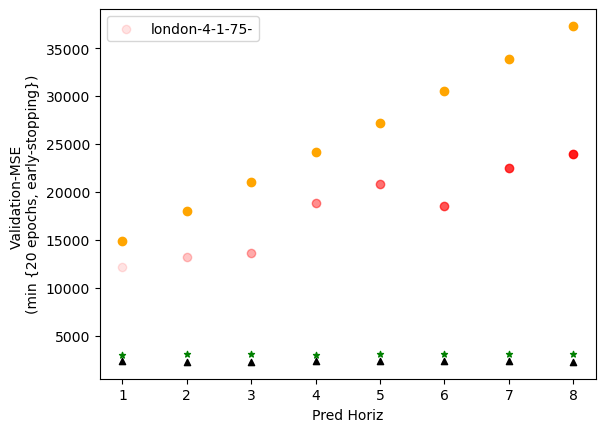

stats.spearmanr(csr_PM_list, val_loss_non_zero_list).statistic : 0.6190476190476191
stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list).statistic : 0.3571428571428572
stats.spearmanr(csr_model_list, val_loss_non_zero_list).statistic : 0.38095238095238104
stats.spearmanr(csr_model_list, csr_PM_list).statistic : -0.28571428571428575
stats.pearsonr(csr_PM_list, val_loss_non_zero_list).statistic : 0.5545932544568266
stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list).statistic : 0.3423073954026302
stats.pearsonr(csr_model_list, val_loss_non_zero_list).statistic : 0.5507937868213437
stats.pearsonr(csr_model_list, csr_PM_list).statistic : -0.22952125046408386


In [95]:

# scales
for city in ["London"]:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    
    for scale in [75]:
        for i_o_length in [4]:
            for pred_horiz in [1,2,3,4,5,6,7,8]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_non_zero_london", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                # sprint (val_loss)
                # sprint (prefix)
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                # epoch_list = epoch_list[-1]
                # val_loss = val_loss[-1]
                
                if naive_model[-1] < val_non_zero_mse[-1] and naive_model[-2] < val_non_zero_mse[-2]:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    continue
                    
                # if loss[-1] > val_loss[-1]:
                #     # invalid, Underfitting
                #     print ("Underfitting case: ", prefix)
                #     continue
                          
                CSR_MP = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["MP"]
                CSR_PM = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM"]
                CSR_PM_frac = CSR_file_dict[cityname, i_o_length, pred_horiz, scale]["PM_frac"]                
                
                if cityname in city_label_printed:
                    plt.scatter(pred_horiz, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=pred_horiz/9)
                else:
                    plt.scatter(pred_horiz, min(val_non_zero_mse[-1], val_non_zero_mse[-2]), 
                             color=city_color[cityname],\
                            alpha=pred_horiz/9, \
                            label=prefix)
                    city_label_printed.append(cityname)
                    
                plt.scatter(pred_horiz, CSR_MP, marker="^", s = 20, color="black") 
                plt.scatter(pred_horiz, CSR_PM, marker="*", s = 20, color="green")   
                # plt.scatter(pred_horiz, CSR_PM_frac/8000, marker="v", s = 20, color="green")
                plt.scatter(pred_horiz, naive_model[-1], alpha=1, color="orange")                
                
                
                csr_model_list.append(CSR_MP)
                csr_PM_list.append(CSR_PM)                
                csr_PM_frac_list.append(CSR_PM_frac)
                
                val_loss_non_zero_list.append(min(val_non_zero_mse[-1], val_non_zero_mse[-2])) 
                # min of last two values since the early stopping takes care of restoring the model
                # we have early stopping = 1 

plt.xlabel("Pred Horiz")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
# plt.yscale('log')
plt.legend()
plt.show()


from scipy import stats

# def statistic(x):  # permute only `x`
#     return stats.spearmanr(x, val_loss_non_zero_list).statistic
# x = csr_PM_frac_list
# res_exact = stats.permutation_test((x,), statistic, permutation_type='pairings')
# sprint (res_exact)
# res_asymptotic = stats.spearmanr(x, val_loss_non_zero_list)
# sprint (res_exact.pvalue, res_asymptotic.pvalue)

sprint (stats.spearmanr(csr_PM_list, val_loss_non_zero_list).statistic)
sprint (stats.spearmanr(csr_PM_frac_list, val_loss_non_zero_list).statistic)
sprint (stats.spearmanr(csr_model_list, val_loss_non_zero_list).statistic)
sprint (stats.spearmanr(csr_model_list, csr_PM_list).statistic)

sprint (stats.pearsonr(csr_PM_list, val_loss_non_zero_list).statistic)
sprint (stats.pearsonr(csr_PM_frac_list, val_loss_non_zero_list).statistic)
sprint (stats.pearsonr(csr_model_list, val_loss_non_zero_list).statistic)
sprint (stats.pearsonr(csr_model_list, csr_PM_list).statistic)


[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-8-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-7-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-6-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-5-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-4-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-3-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-2-1-45-.csv'
i_o_length : 1
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-8-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-7-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-6-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-5-1-45-.csv'
[Errno

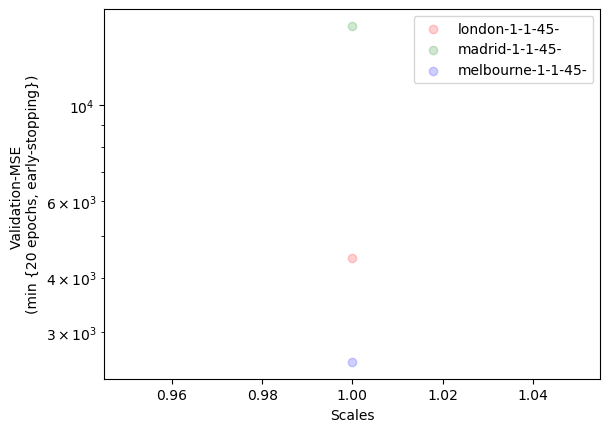

In [38]:

# i_o_length
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales_def:
        for i_o_length in config.i_o_lengths[::-1]:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    # continue
                    # raise Exception(e)
                    print (str(e))
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
#                 if naive_model[-1] < val_loss:
#                     # invalid, GIGO regime
#                     continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                sprint (i_o_length)
                
                if cityname in city_label_printed:
                    plt.scatter(i_o_length, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales))
                else:
                    plt.scatter(i_o_length, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales), \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()

ValueError: alpha (1.3076923076923077) is outside 0-1 range

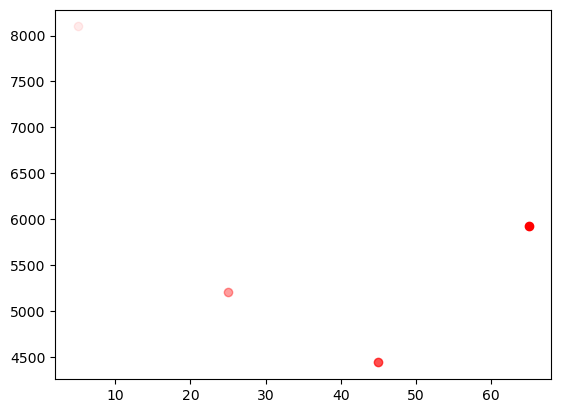

In [19]:

# pred_horiz
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales:
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
#                 if naive_model[-1] < val_loss:
#                     # invalid, GIGO regime
#                     continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/65)
                else:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/65, \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()